<a href="https://colab.research.google.com/github/i-johnvictor/ml_with_tensorflow/blob/main/05_tf_cnn_complex_image_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Lets get to perform binary classification of whether the image is a horse or a human using CNN
# First let's get the dataset from Google
!wget \
  https://storage.googleapis.com/learning-datasets/horse-or-human.zip \
  -O /tmp/horse-or-human.zip

--2025-05-23 06:36:40--  https://storage.googleapis.com/learning-datasets/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.207, 173.194.216.207, 173.194.217.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   200MB/s    in 0.7s    

2025-05-23 06:36:41 (200 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
# Lets unzip
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [3]:
# These are folders of human and horses with the images. As we earlier learned to have labels.
# In this case, we can specify the label based on the folder where the image is read from

# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')


In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse20-4.png', 'horse36-0.png', 'horse04-4.png', 'horse10-8.png', 'horse29-7.png', 'horse18-5.png', 'horse40-7.png', 'horse03-8.png', 'horse16-8.png', 'horse16-1.png']
['human04-08.png', 'human11-23.png', 'human14-20.png', 'human04-05.png', 'human05-17.png', 'human10-12.png', 'human14-23.png', 'human09-19.png', 'human13-09.png', 'human14-03.png']


In [5]:
# let's see how many of each category do we have
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [6]:
# import matplotlib.pyplot as plt
# %matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)
(300, 300, 4)


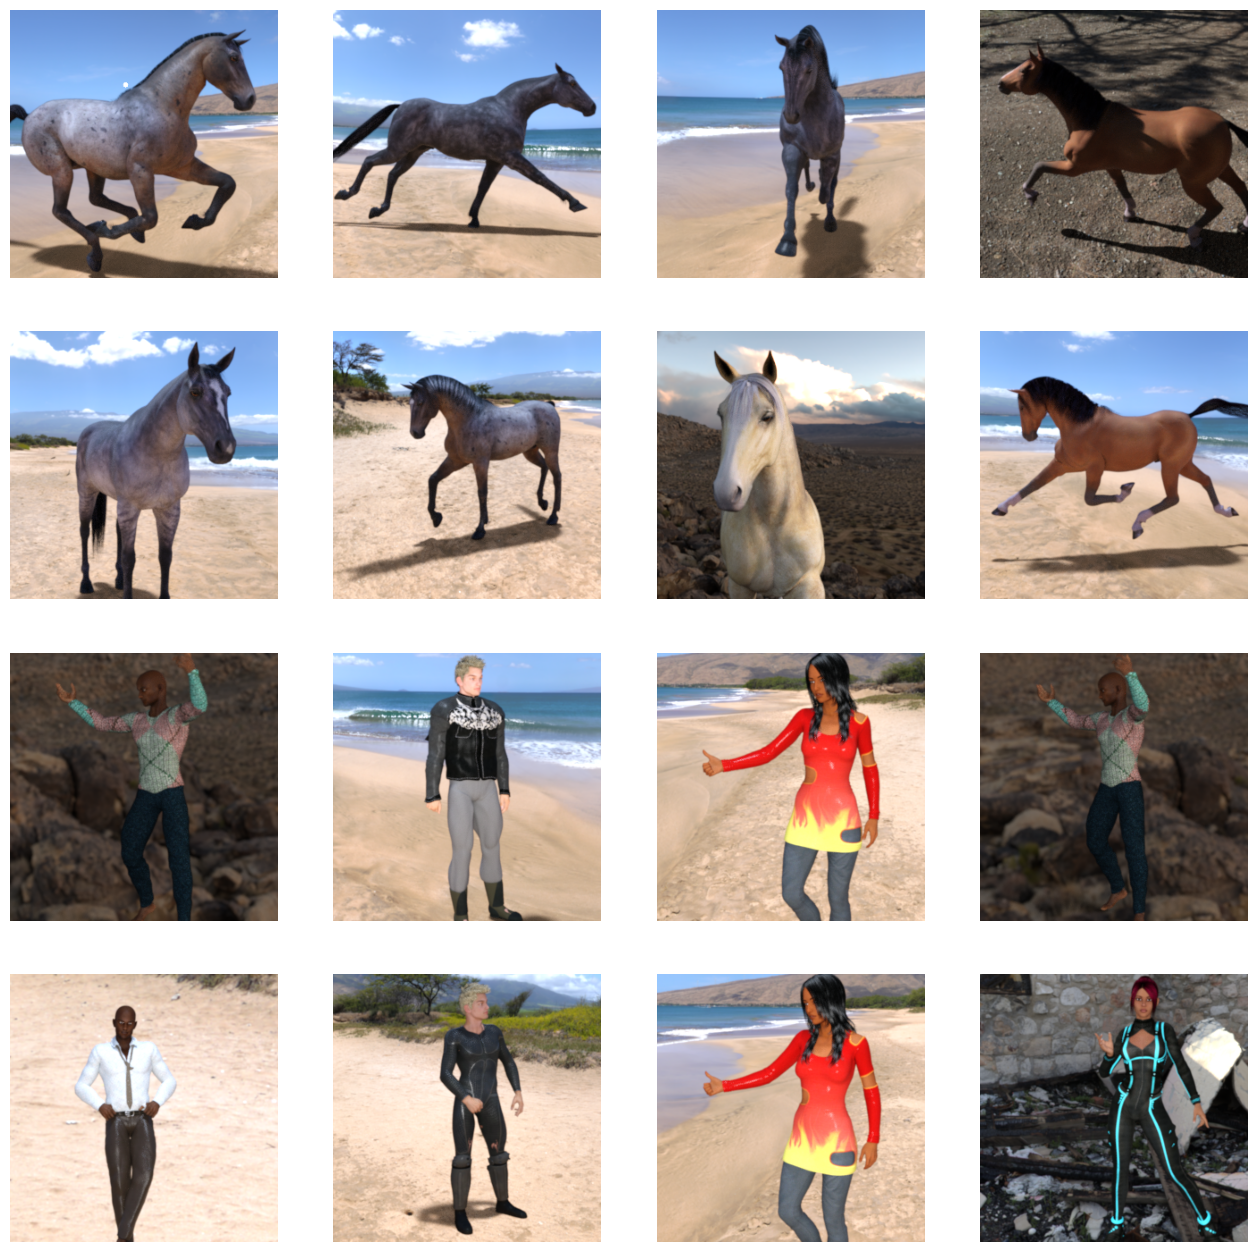

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  print(img.shape)
  plt.imshow(img)

plt.show()


In [8]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 33, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,704,097 (6.50 MB)

 Trainable params: 1,704,097 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:


model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [ ]:
# Need to learn what these optimizers are ADAM, SGD, RMSProp

In [20]:
# All images will be rescaled by 1./255
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [21]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 595ms/step - acc: 0.8103 - loss: 0.9780
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9531 - loss: 0.1267  
Epoch 3/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 713ms/step - acc: 0.8722 - loss: 0.7594
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9531 - loss: 0.1276  
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 831ms/step - acc: 0.9830 - loss: 0.0664
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9688 - loss: 0.0854  
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 689ms/step - acc: 0.9775 - loss: 0.0711
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.7812 - loss: 0.6229  
Epoch 9/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 702ms/step - acc: 0.9434 - loss: 0.1789
Epoch 10/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9922 - loss: 0.0363  
Epoch 11/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 707ms/step - acc: 0.9800 - loss: 0.0411
Epoch 12/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9922 - loss: 0.0375  
Epoch 13/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 820ms/step - acc: 0.9759 - loss: 0.0656
Epoch 14/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 1.0000 - loss: 0.0129  
Epoch 15/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 801ms/step - acc: 

In [22]:

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving human.jpeg.png to human.jpeg (1).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
[1.]
human.jpeg (1).png is a human
